# Network Model - Analysis

In [56]:
# Libraries
import numpy as np
import pandas as pd
import igraph as ig
import networkx as nx
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from auxiliar_funcs import *
import matplotlib.pyplot as plt
import powerlaw as plaw
import collections

### Load Data

In [3]:
# LOAD DATA
url_file = "../00-Data/train.csv"
df_data = pd.read_csv(url_file)
print("Data loaded!")
print(df_data.info())

# User attributes
user_attrs = df_data.columns[2:]

# Number of users
n_users = len(df_data[user_attrs].drop_duplicates())
n_rsrcs = len(df_data.RESOURCE.drop_duplicates())
print("|U|: ", n_users) # Unique users
print("|R|: ", n_rsrcs) # Unique resources

# Create an index for every users
user_dict = {}
for u_idx, u_attr in enumerate(df_data[user_attrs].drop_duplicates().values):
    idx = "999" + str(u_idx) + "999"
    user_dict[int(idx)] = list(u_attr)
print("|U| :", len(user_dict))

# Create a new column to add in a DF
list_usr_idx = []
key_list = list(user_dict.keys()) # list out keys and values separately
val_list = list(user_dict.values())
for log in df_data[user_attrs].values:
    key_idx = val_list.index(list(log))
    list_usr_idx.append(key_list[key_idx])
print("|L'| :", len(list_usr_idx), " = |L| :", len(df_data))
df_data["USERID"] = list_usr_idx

print()
df_pos_entries = df_data[df_data.ACTION==1]
df_neg_entries = df_data[df_data.ACTION==0]
print('Num positive entries:',len(df_pos_entries), 
    "{:.4}%".format((len(df_pos_entries)/len(df_data))*100))
print('Num negative entries:',len(df_neg_entries),
    "{:.4}%".format((len(df_neg_entries)/len(df_data))*100))

##### ***** Cross-Validation Configuration ***** #####
k = 10
test_size = 0.2
kfold = StratifiedShuffleSplit(n_splits=k, test_size=test_size, random_state=1)

data_partition = kfold.split(df_data, df_data.ACTION)
data_corpus = [] # Lista donde se almacenan los k fols

for train_data, test_data in data_partition:        
    X_train, X_test = df_data.iloc[train_data], df_data.iloc[test_data]
    data_corpus.append([X_train, X_test])

print("Done!")

Data loaded!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB
None
|U|:  9561
|R|:  7518
|U| : 9561
|L'| : 32769  = |L| : 32769

Num positive entries: 30872 94.21%
Num negative entries: 1897 5.789%
Done!


### Data Pre-processing

In [4]:
##### ***** Control Variables ***** #####
id_kfold = 0
task4 = False
#########################################

df_train_k, df_test_k = data_corpus[id_kfold][0], data_corpus[id_kfold][1]
print("# Train access request =", len(df_train_k), 
      " %: {:.2f}".format((len(df_train_k)/(len(df_train_k)+len(df_test_k)))*100))
print("# Test access request =", len(df_test_k),
      " %: {:.2f}".format((len(df_test_k)/(len(df_train_k)+len(df_test_k)))*100))
print("# Total =", len(df_train_k)+len(df_test_k))
print()

##### ***** Task 1: Null and uknwokn values ***** #####
print("TASK 1: Done!"); print() # NA


##### ***** TASK 2: convert continuous values to categorical values ***** #####
print("TASK 2: Done!"); print() # NA 

##### ***** TASK 3: Drop duplicates access requests ***** #####
print("TASK 3: Drop duplicates access requests")
df_train_k_pos = df_train_k[df_train_k.ACTION==1]   # Train Pos
df_train_k_neg = df_train_k[df_train_k.ACTION==0]   # Train Neg
df_test_k_pos = df_test_k[df_test_k.ACTION==1]      # Test Pos
df_test_k_neg = df_test_k[df_test_k.ACTION==0]      # Test Neg
df_train_k_pos = df_train_k_pos[df_train_k_pos.columns[1:]].drop_duplicates()
df_train_k_neg = df_train_k_neg[df_train_k_neg.columns[1:]].drop_duplicates()
df_test_k_pos = df_test_k_pos[df_test_k_pos.columns[1:]].drop_duplicates()
df_test_k_neg = df_test_k_neg[df_test_k_neg.columns[1:]].drop_duplicates()
print()

print("# Solicitudes Train (+):", len(df_train_k_pos), " %: {:.2f}".format(
      (len(df_train_k_pos)/len(df_train_k))*100))
print("# Solicitudes Train (-):", len(df_train_k_neg), " %: {:.2f}".format(
      (len(df_train_k_neg)/len(df_train_k))*100))
print("# Solicitudes Test (+):", len(df_test_k_pos), " %: {:.2f}".format(
      (len(df_test_k_pos)/len(df_test_k))*100))
print("# Solicitudes Test (-):", len(df_test_k_neg), " %: {:.2f}".format(
      (len(df_test_k_neg)/len(df_test_k))*100))
print("# Train Users (+): ", len(df_train_k_pos.USERID.drop_duplicates()))
print("# Train Resrc (+): ", len(df_train_k_pos.RESOURCE.drop_duplicates()))
print("# Train Users (-): ", len(df_train_k_neg.USERID.drop_duplicates()))
print("# Train Resrc (-): ", len(df_train_k_neg.RESOURCE.drop_duplicates()))
print("# Test Users (+): ", len(df_test_k_pos.USERID.drop_duplicates()))
print("# Test Resrc (+): ", len(df_test_k_pos.RESOURCE.drop_duplicates()))
print("# Test Users (-): ", len(df_test_k_neg.USERID.drop_duplicates()))
print("# Test Resrc (-): ", len(df_test_k_neg.RESOURCE.drop_duplicates())); print()

if task4:
    # Filter resources
      n1 = 0
      n2 = 149
      top_list = df_train_k_pos.RESOURCE.value_counts()[:len(df_train_k_pos.RESOURCE.drop_duplicates())].index.tolist()
      # Filter the interval between n1 and n2
      top_list = top_list[n1:n2+1]
      print('#Filtered resources:', len(top_list))
      boolean_series = df_train_k_pos.RESOURCE.isin(top_list)
      df_train_k_pos = df_train_k_pos[boolean_series]
      bolean_series = df_train_k_neg.RESOURCE.isin(top_list)
      df_train_k_neg = df_train_k_neg[bolean_series]
      print("Done!")
      

# Train access request = 26215  %: 80.00
# Test access request = 6554  %: 20.00
# Total = 32769

TASK 1: Done!

TASK 2: Done!

TASK 3: Drop duplicates access requests

# Solicitudes Train (+): 24697  %: 94.21
# Solicitudes Train (-): 1518  %: 5.79
# Solicitudes Test (+): 6175  %: 94.22
# Solicitudes Test (-): 379  %: 5.78
# Train Users (+):  8576
# Train Resrc (+):  6414
# Train Users (-):  830
# Train Resrc (-):  950
# Test Users (+):  4087
# Test Resrc (+):  2748
# Test Users (-):  301
# Test Resrc (-):  316



### Network Modelling

In [5]:
def build_network_model(data, usr_id_name, res_id_name, file_path=None):
    """
    Builds the Access Requests Bipartite Network from Access log.

    Args:
        data (pandas dataframe): The Access Log.
        usr_id_name (str): The name of the ID users column in the Access Log
        res_id_name (str): The name of the ID resources column in the Access Log
    
    Returns:
        Graph (iGraph): The Access Requests Bipartite Network.

    Raises:
        TypeError: If a network is not Bipartite.
    """
    
    list_of_edges = []
    bi_network = nx.Graph() # NetworkX Graph object

    for usr_idx, rsr_idx in data[[usr_id_name, res_id_name]].values:
        list_of_edges.append((int(usr_idx), int(rsr_idx))) # Tuple of edges
    bi_network.add_edges_from(list_of_edges) # Build Network with edges

    # Change networkX object to iGraph object
    bi_network = ig.Graph.from_networkx(bi_network)
    bi_network.vs['name'] = bi_network.vs["_nx_name"] # Clean name column
    del bi_network.vs["_nx_name"] # Remove uncleaned name column

    print(bi_network.summary())
    print(bi_network.vs())

    if not bi_network.is_bipartite():
        raise TypeError("The ARBN is not bipartite")

    ### Add type of node (user or resource)
    list_of_resources_in_data = list(data[res_id_name])
    list_node_type = []
    for node in bi_network.vs():
        if node['name'] in list_of_resources_in_data:
            list_node_type.append(1) # A resource
        else:
            list_node_type.append(0) # An user
    bi_network.vs["typen"] = list_node_type
    ### End node type

    if not file_path == None: # Create a file
        ig.write(bi_network, file_path)

    print("ARBN builded!")
    print(bi_network.summary())
    print("|U-Nodes| =", len(bi_network.vs.select(typen=0)))
    print("|R-Nodes| =", len(bi_network.vs.select(typen=1)))

    return bi_network
    

In [6]:
bip_network = build_network_model(df_train_k_pos, 'USERID', 'RESOURCE')

IGRAPH UN-- 14990 24697 -- 
+ attr: name (v)
ARBN builded!
IGRAPH UN-- 14990 24697 -- 
+ attr: name (v), typen (v)
|U-Nodes| = 8576
|R-Nodes| = 6414


### User network

In [7]:
def get_edge_weight(i_node, j_node):
    """
    Compute the weight of an edge between i and j nodes.

    Args:
        i_node (networkX node): i node.
        j_node (networkX node): j node.
    
    Returns:
        weight (float): The weight between nodes.

    Raises:
        TypeError: if there are not an intersection
    """
    neighs_i = set(i_node.neighbors())
    neighs_j = set(j_node.neighbors())

    insersection_neighbors = neighs_i.intersection(neighs_j)
    
    weight = (len(insersection_neighbors)*len(insersection_neighbors)) / (len(neighs_i)*len(neighs_j))

    return weight


def bipartite_projection(biparte_network, node_type=0):
    """
    Generate a monopartite network from bipartite network.

    Parameters:
        bipartite_network (igraph Graph): The bipartie network.
        node_type (int): The set of nodes of the monopartite network.

    Returns:
        Graph (iGraph): The monopartite (projected) network.

    Raises:
        Some
    """

    #Check if the bipartite network is a bipartite network:
    if not biparte_network.is_bipartite():
        raise TypeError("The ARBN is not bipartite")

    # networkX object (more easy to buil)
    g = nx.Graph()

    # All opposite node set
    opposite_nodes = biparte_network.vs.select(typen=1)

    # Check for every node the same type
    for X_node in opposite_nodes:
        # Select all neighbors of the X_node
        neighbordhood = X_node.neighbors()

        for Y_node_i in neighbordhood:
            for Y_node_j in neighbordhood:
                # Ceck if both nodes are the same
                if Y_node_i['name'] != Y_node_j['name']:
                    # If there is no an edge generate
                    if not g.has_edge(Y_node_i['name'], Y_node_j['name']):
                        weight_ = get_edge_weight(Y_node_i, Y_node_j)
                        #print("Peso: ", Y_node_i['name'], "-", Y_node_j['name'], " => ", weight_)
                        g.add_edge(Y_node_i["name"], Y_node_j["name"],
                                   weight=weight_)                                 

    # Convert from networkX graph to igraph graph
    g = ig.Graph.from_networkx(g)
    g.vs["name"] = g.vs["_nx_name"]
    del g.vs["_nx_name"]
    
    return g


In [315]:
user_network = bipartite_projection(bip_network, 0)
print(user_network.summary())
# ig.write(user_network, "graphs/amz_user_network.gml")

IGRAPH UNW- 8250 772907 -- 
+ attr: name (v), weight (e)


### Network Analysis

In [9]:
density = user_network.density()
print("Density:", density)

avg_degree = sum(user_network.degree()) / user_network.vcount()
print("Avg. degree", avg_degree)

components = user_network.components()
print("Connected Components:", len(components))



Density: 0.022714437379002778
Avg. degree 187.37139393939393
Connected Components: 75


In [319]:
max(user_network.degree())

1660

1660


Text(0, 0.5, 'P(k)')

<Figure size 432x288 with 0 Axes>

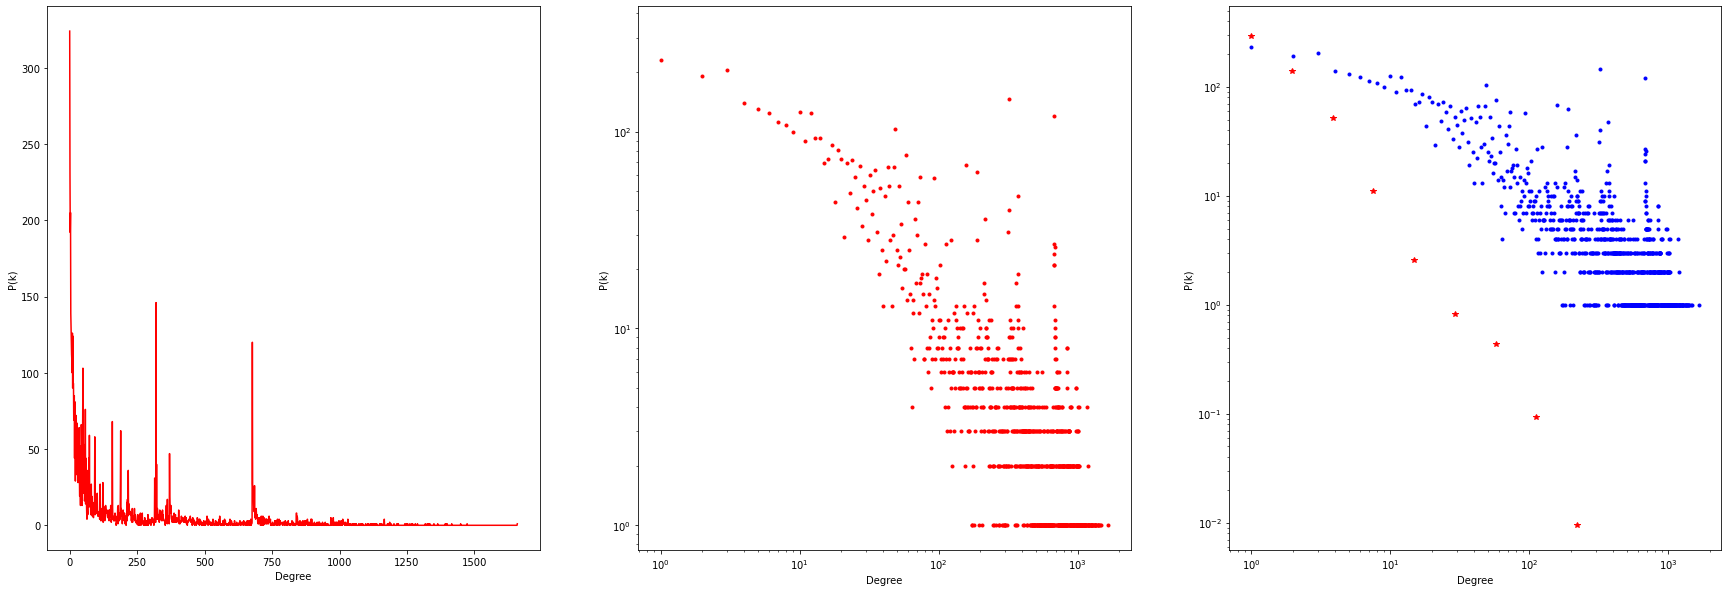

In [312]:
max_degree = max(user_network.degree())
print(max_degree)

# Crear una lista donde se almacena
degree_list = np.zeros(max_degree, dtype=int)

for node in user_network.vs():    
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)

#degree_list = degree_list / user_network.vcount()

plt.clf()
fig = plt.figure(figsize=(30, 10))     

plt.subplot(1, 3, 1)
plt.plot(degree_list, "r")
plt.xlabel('Degree')
plt.ylabel('P(k)')

plt.subplot(1, 3, 2)
plt.plot(range(max_degree), degree_list, "r.")
plt.loglog()
plt.xlabel('Degree')
plt.ylabel('P(k)')

plt.subplot(1, 3, 3)
bins = np.logspace(0, 3.22, 12)
plt.plot(bins[:-1], hist_norm, "r*")
plt.plot(range(max_degree), degree_list, "b.")
plt.loglog()
plt.xlabel('Degree')
plt.ylabel('P(k)')

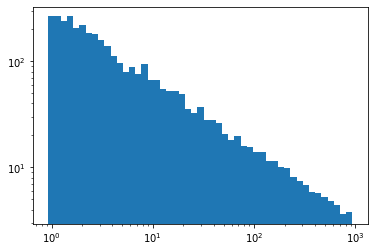

In [101]:
import numpy as np
from matplotlib import pyplot as plt

# something random to plot
data = (np.random.random(10000)*10)**3

# log-scaled bins
bins = np.logspace(0, 3, 50)
widths = (bins[1:] - bins[:-1])

# Calculate histogram
hist = np.histogram(data, bins=bins)
# normalize by bin width
hist_norm = hist[0]/widths

# plot it!
plt.bar(bins[:-1], hist_norm, widths)
plt.xscale('log')
plt.yscale('log')

In [ ]:
# Como calcular el bin de stop? Fácil. 
# Log(max(degree_list))

In [169]:
widths

array([1.63360424e-01, 1.90047053e-01, 2.21093220e-01, 2.57211102e-01,
       2.99229217e-01, 3.48111429e-01, 4.04979059e-01, 4.71136610e-01,
       5.48101687e-01, 6.37639811e-01, 7.41804921e-01, 8.62986488e-01,
       1.00396433e+00, 1.16797236e+00, 1.35877283e+00, 1.58074253e+00,
       1.83897330e+00, 2.13938876e+00, 2.48888022e+00, 2.89546475e+00,
       3.36846910e+00, 3.91874364e+00, 4.55891126e+00, 5.30365694e+00,
       6.17006459e+00, 7.17800895e+00, 8.35061154e+00, 9.71477099e+00,
       1.13017801e+01, 1.31480437e+01, 1.52959137e+01, 1.77946606e+01,
       2.07016040e+01, 2.40834268e+01, 2.80177056e+01, 3.25946898e+01,
       3.79193722e+01, 4.41138969e+01, 5.13203619e+01, 5.97040780e+01,
       6.94573615e+01, 8.08039455e+01, 9.40041124e+01, 1.09360664e+02,
       1.27225869e+02, 1.48009540e+02, 1.72188442e+02, 2.00317219e+02,
       2.33041124e+02])

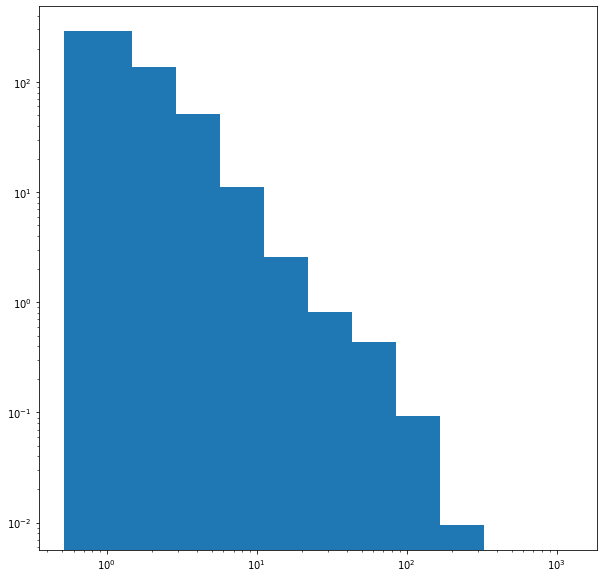

In [303]:
# something random to plot
data = degree_list
# log-scaled bins
plt.figure(figsize=(10, 10))
bins = np.logspace(0, 3.22, 12)
widths = (bins[1:] - bins[:-1])

# Calculate histogram
hist = np.histogram(data, bins=bins)
# normalize by bin width
hist_norm = hist[0]/widths

# plot it!
plt.bar(bins[:-1], hist_norm, widths)
plt.xscale('log')
plt.yscale('log')

In [306]:
widths

array([  0.96212772,   1.88781746,   3.70413897,   7.26799374,
        14.26073196,  27.98137744,  54.90303625, 107.72676919,
       211.37367973, 414.74215571, 813.77707926])

In [309]:
hist[0]

array([279, 261, 191,  81,  37,  23,  24,  10,   2,   0,   0])

In [285]:
suma_ = 0
anterior_i = 0
lista_x = []
for i in range(1, 12):    
    cal = 2 ** (i)
    suma_ = suma_ + cal
    print("Corte:",cal)
    temp = sum(degree_list[anterior_i:cal])
    print("Elementos de", anterior_i,"-", cal, " = ", temp)
    anterior_i = cal
    lista_x.append(temp)
    if suma_ > len(degree_list):
        print("Corte:",len(degree_list))
        temp = sum(degree_list[anterior_i:len(degree_list)])
        print("Elementos de", anterior_i,"-", cal, " = ", temp)
        
        lista_x.append(temp)
        anterior_i = cal
        break
lista_x

Corte: 2
Elementos de 0 - 2  =  555
Corte: 4
Elementos de 2 - 4  =  397
Corte: 8
Elementos de 4 - 8  =  505
Corte: 16
Elementos de 8 - 16  =  803
Corte: 32
Elementos de 16 - 32  =  901
Corte: 64
Elementos de 32 - 64  =  1174
Corte: 128
Elementos de 64 - 128  =  845
Corte: 256
Elementos de 128 - 256  =  920
Corte: 512
Elementos de 256 - 512  =  1089
Corte: 1024
Elementos de 512 - 1024  =  981
Corte: 1660
Elementos de 1024 - 1024  =  80


[555, 397, 505, 803, 901, 1174, 845, 920, 1089, 981, 80]

In [264]:
degree_list[:10]

array([324, 231, 192, 205, 139, 130, 124, 112, 108, 100])

Text(0, 0.5, 'P(k)')

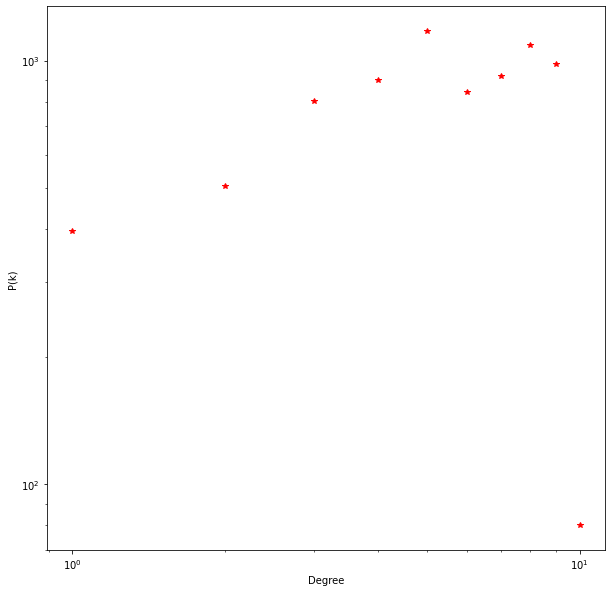

In [290]:
plt.figure(figsize=(10, 10))
plt.plot(lista_x, "r*")
plt.loglog()
plt.xlabel('Degree')
plt.ylabel('P(k)')

In [301]:
degreeCount = collections.Counter(sorted(user_network.degree()))
deg, cnt = zip(*degreeCount.items())
list(cnt)

[324,
 231,
 192,
 205,
 139,
 130,
 124,
 112,
 108,
 100,
 126,
 90,
 124,
 93,
 93,
 69,
 73,
 85,
 44,
 81,
 73,
 29,
 69,
 49,
 72,
 59,
 41,
 67,
 33,
 53,
 45,
 28,
 60,
 38,
 50,
 64,
 31,
 19,
 52,
 25,
 13,
 47,
 22,
 66,
 53,
 28,
 13,
 30,
 66,
 103,
 25,
 21,
 53,
 23,
 34,
 16,
 20,
 20,
 76,
 14,
 44,
 25,
 15,
 8,
 4,
 14,
 12,
 7,
 36,
 17,
 30,
 44,
 12,
 59,
 17,
 18,
 19,
 15,
 7,
 7,
 27,
 13,
 19,
 8,
 6,
 8,
 15,
 9,
 5,
 11,
 7,
 10,
 14,
 58,
 13,
 7,
 18,
 16,
 8,
 8,
 11,
 9,
 21,
 11,
 6,
 7,
 8,
 7,
 9,
 6,
 9,
 4,
 10,
 27,
 7,
 3,
 4,
 11,
 6,
 7,
 3,
 8,
 5,
 28,
 2,
 6,
 6,
 6,
 6,
 12,
 3,
 7,
 5,
 13,
 11,
 8,
 10,
 9,
 8,
 8,
 6,
 5,
 10,
 5,
 7,
 5,
 3,
 6,
 10,
 5,
 10,
 7,
 13,
 4,
 2,
 4,
 4,
 5,
 68,
 12,
 4,
 5,
 4,
 3,
 6,
 3,
 3,
 6,
 8,
 4,
 6,
 6,
 1,
 1,
 4,
 2,
 4,
 12,
 1,
 13,
 5,
 5,
 6,
 3,
 8,
 4,
 4,
 28,
 62,
 8,
 11,
 9,
 6,
 6,
 1,
 6,
 5,
 10,
 5,
 8,
 4,
 3,
 8,
 5,
 1,
 6,
 5,
 4,
 4,
 3,
 15,
 3,
 17,
 6,
 7,
 36,
 9,
 10,
 1

In [302]:
len(cnt)

908

Text(0, 0.5, 'P(k)')

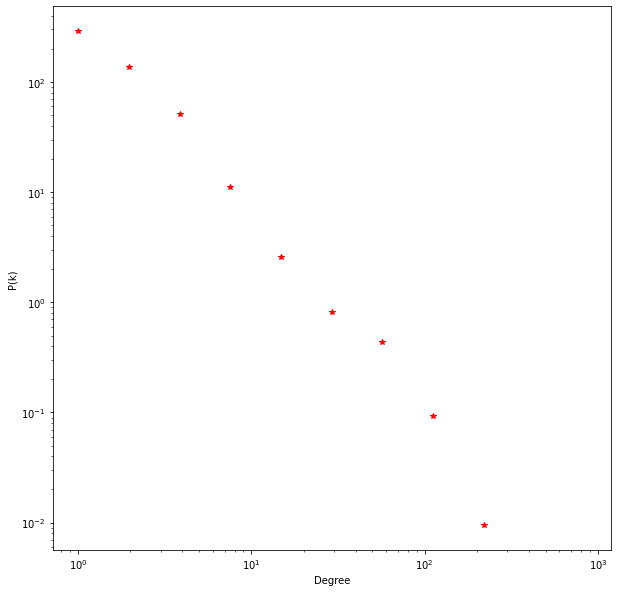

In [260]:
plt.figure(figsize=(10, 10))
plt.plot(bins[:-1], hist_norm, "r*")
plt.loglog()
plt.xlabel('Degree')
plt.ylabel('P(k)')

In [155]:
hist_norm[1]

0.0

In [134]:
max(degree_list)

324

In [122]:
np.logspace(start=0, stop=3.02, num=50)

array([1.00000000e+00, 1.15247802e+00, 1.32820560e+00, 1.53072776e+00,
       1.76413011e+00, 2.03312118e+00, 2.34312749e+00, 2.70040294e+00,
       3.11215504e+00, 3.58669029e+00, 4.13358175e+00, 4.76386212e+00,
       5.49024641e+00, 6.32738834e+00, 7.29217601e+00, 8.40407261e+00,
       9.68550900e+00, 1.11623363e+01, 1.28643473e+01, 1.48258775e+01,
       1.70864980e+01, 1.96918135e+01, 2.26943823e+01, 2.61547769e+01,
       3.01428057e+01, 3.47389211e+01, 4.00358432e+01, 4.61404295e+01,
       5.31758310e+01, 6.12839767e+01, 7.06284364e+01, 8.13977209e+01,
       9.38090846e+01, 1.08112908e+02, 1.24597751e+02, 1.43596170e+02,
       1.65491431e+02, 1.90725237e+02, 2.19806644e+02, 2.53322327e+02,
       2.91948415e+02, 3.36464133e+02, 3.87767520e+02, 4.46893545e+02,
       5.15034990e+02, 5.93566508e+02, 6.84072356e+02, 7.88378358e+02,
       9.08588733e+02, 1.04712855e+03])

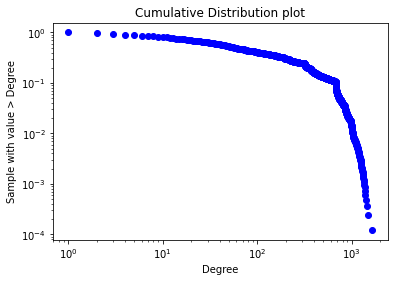

In [107]:
degree_sequence = sorted([d for d in user_network.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(np.array(cnt)/user_network.vcount())
plt.loglog(deg, cs, 'bo')
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")
plt.show()

1660
Calculating best minimal value for power law fit


<Figure size 432x288 with 0 Axes>

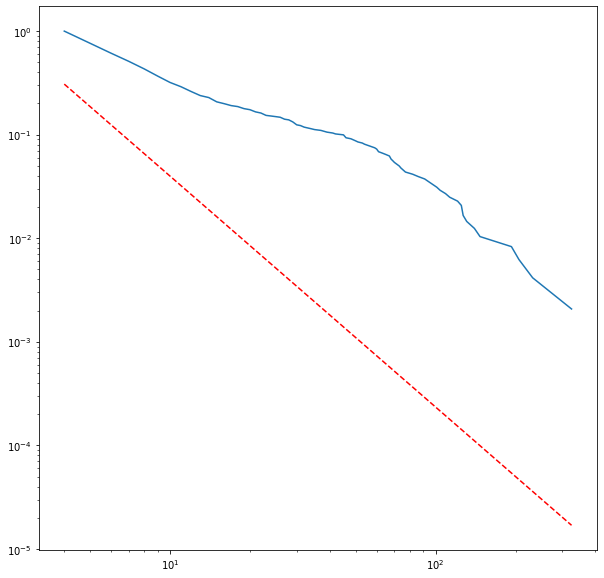

In [14]:
max_degree = max(user_network.degree())
print(max_degree)

# Crear una lista donde se almacena
degree_list = np.zeros(max_degree, dtype=int)

for node in user_network.vs():
    #print(node.degree())
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)
    

#distri_grados = [i/user_network.vcount() for i in user_network.degree()]
#distri_grados = [i for i in user_network.degree()]
plt.clf()
plt.figure(figsize=(10,10))
#plt.plot(range(max_degree), degree_list, "b.")
fit = plaw.Fit(np.array(degree_list)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
fit.plot_ccdf()
#plt.yscale("log")
#plt.xscale("log")
plt.show()
print()

In [ ]:
max_degree = max(user_network.degree())
print(max_degree)

# Crear una lista donde se almacena
degree_list = np.zeros(max_degree, dtype=int)

for node in user_network.vs():
    #print(node.degree())
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)
    

#distri_grados = [i/user_network.vcount() for i in user_network.degree()]
#distri_grados = [i for i in user_network.degree()]
plt.clf()
plt.figure(figsize=(10,10))
plt.plot(range(max_degree), degree_list, "b.")
#fit = powerlaw.Fit(np.array(degree_list)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
#fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
#fit.plot_ccdf()
#plt.yscale("log")
#plt.xscale("log")
plt.show()
print()

1000


<Figure size 432x288 with 0 Axes>

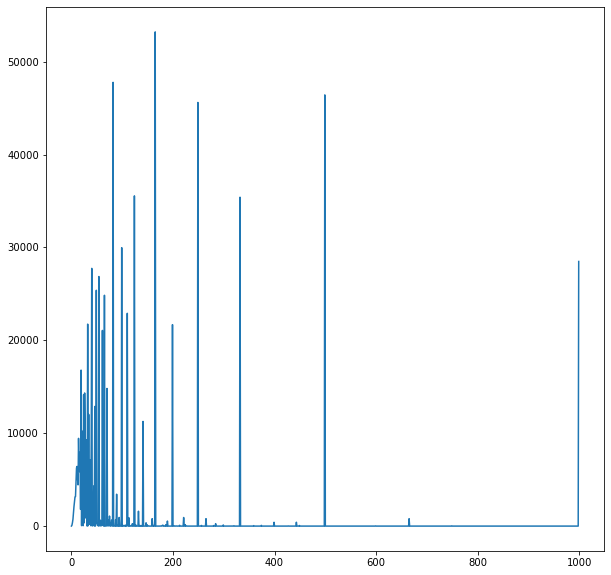

In [66]:
arreglo_test = (np.array(user_network.es['weight'])*1000).astype(int)
max_peso = max(arreglo_test)
print(max_peso)

# Crear una lista donde se almacena
arreglo_test_ = np.zeros(max_peso, dtype=int)

for node in arreglo_test:
    #print(node.degree())
    arreglo_test_[node-1] = (arreglo_test_[node-1] + 1)

plt.clf()
plt.figure(figsize=(10,10))
plt.plot(arreglo_test_)
#fit = powerlaw.Fit(np.array(degree_list)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
#fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
#fit.plot_ccdf()
#plt.yscale("log")
#plt.xscale("log")
plt.show()
print()

In [ ]:
len(arreglo_test)

P6: Scale-free distribution p(k) = ∼k^{−α}.


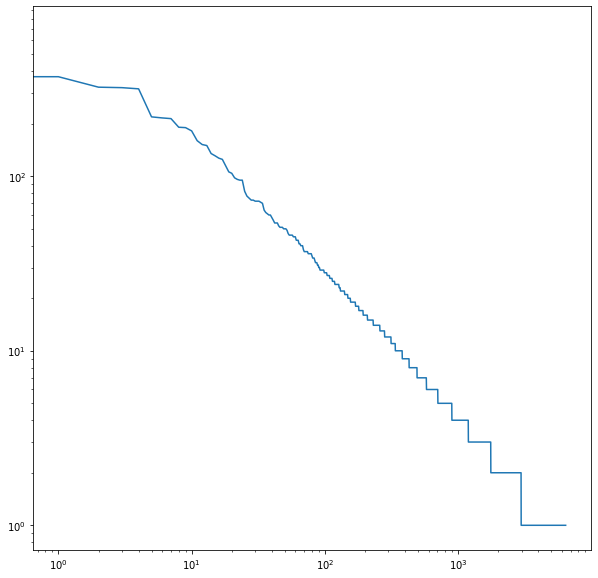

In [166]:
##### P6: Scale-free distribution p(k) = ∼k−α. #####
print("P6: Scale-free distribution p(k) = ∼k^{−α}.")
distri_grados = df_train_k_pos.RESOURCE.value_counts()
plt.figure(figsize=(10,10))
plt.plot(sorted(distri_grados,reverse=True))
#x1, y1 = [100, 700], [0.13, 0.015]
#x2, y2 = [1, 231], [3, 2]
#plt.plot(x1, y1, marker = 'o')
plt.yscale("log")
plt.xscale("log")
plt.show()
print()

Calculating best minimal value for power law fit


<Figure size 432x288 with 0 Axes>

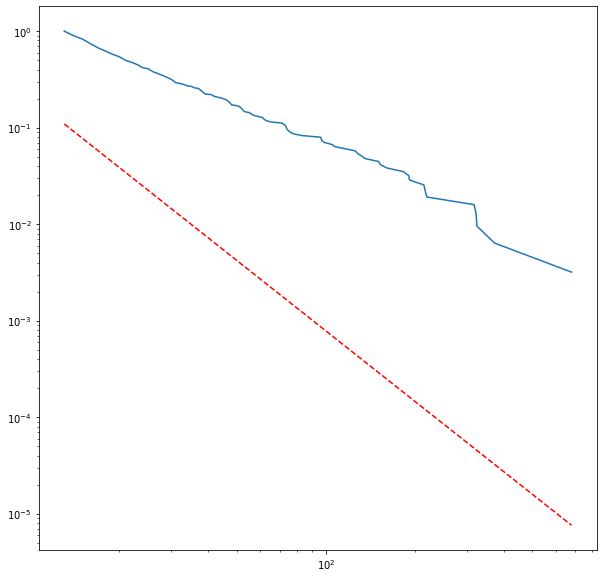

In [15]:
distri_grados = df_train_k_pos.RESOURCE.value_counts()

#distri_grados = [i/user_network.vcount() for i in user_network.degree()]
#distri_grados = [i for i in user_network.degree()]
plt.clf()
plt.figure(figsize=(10,10))
#plt.plot(range(max_degree), degree_list, "b.")
fit = plaw.Fit(np.array(distri_grados)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
fit.plot_ccdf()
#plt.yscale("log")
#plt.xscale("log")
plt.show()
print()

In [68]:
user_network_test = user_network.copy()
user_network_test.es.select("weight"<0.4)

TypeError: '<' not supported between instances of 'str' and 'float'

In [73]:
user_network_test.es.select(weight_lt=0.4).delete()

In [74]:
user_network_test.summary()

'IGRAPH UNW- 8250 76677 -- \n+ attr: name (v), weight (e)'

238


<Figure size 432x288 with 0 Axes>

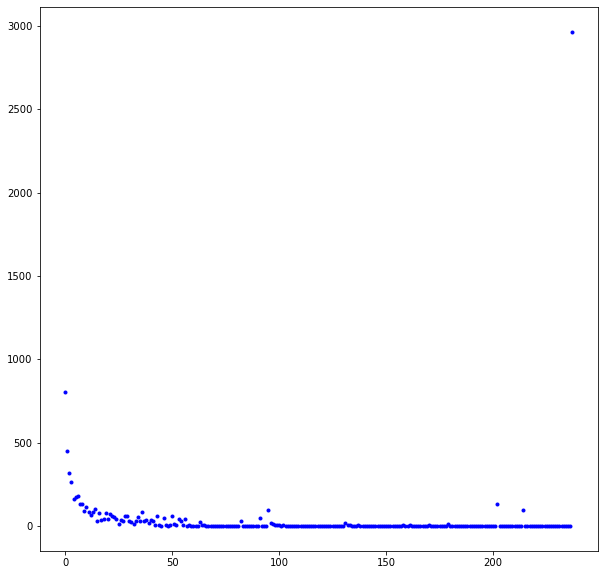

In [75]:
max_degree = max(user_network_test.degree())
print(max_degree)

# Crear una lista donde se almacena
degree_list = np.zeros(max_degree, dtype=int)

for node in user_network_test.vs():
    #print(node.degree())
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)
    

#distri_grados = [i/user_network.vcount() for i in user_network.degree()]
#distri_grados = [i for i in user_network.degree()]
plt.clf()
plt.figure(figsize=(10,10))
plt.plot(range(max_degree), degree_list, "b.")
#fit = powerlaw.Fit(np.array(degree_list)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
#fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
#fit.plot_ccdf()
#plt.yscale("log")
#plt.xscale("log")
plt.show()
print()